<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿Qué-es-una-API?" data-toc-modified-id="¿Qué-es-una-API?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿Qué es una API?</a></span></li><li><span><a href="#¿Cómo-funciona-una-API?" data-toc-modified-id="¿Cómo-funciona-una-API?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>¿Cómo funciona una API?</a></span></li><li><span><a href="#Tipos-de-peticiones" data-toc-modified-id="Tipos-de-peticiones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tipos de peticiones</a></span></li><li><span><a href="#Llamadas-en-Python" data-toc-modified-id="Llamadas-en-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Llamadas en Python</a></span><ul class="toc-item"><li><span><a href="#¿Cómo-hacemos-las-peticiones-a-la-API?" data-toc-modified-id="¿Cómo-hacemos-las-peticiones-a-la-API?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>¿Cómo hacemos las peticiones a la API?</a></span></li></ul></li></ul></div>

# ¿Qué es una API? 

API es el acrónimo de *Application Programming Interface* es una interfaz que permite a dos servicios conectarse e intercambiar información. Se realiza una petición (o request) y se devuelve una respuesta en formato JSON. 

En términos sencillos, es un intermediario de software que permite que dos aplicaciones se comuniquen entre sí. Pensemos en una API como un traductor entre dos personas que no hablan el mismo idioma pero que pueden comunicarse utilizando un intermediario. 

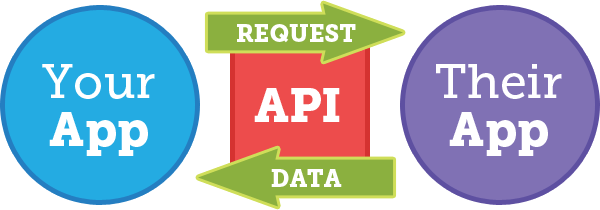


Recordamos que la diferencia entre un JSON y el diccionario al que estamos acostumbrados es que el JSON solo almacena información en formato *string*.

En este punto del Bootcamp es cuando **leer documentación se vuelve esencial**, y es que cada API  "funcionará" de una forma diferente y para poder usarla necesitaremos saber lo que le necesita. 


[Aquí](https://github.com/public-apis/public-apis) tenéis un repo donde podréis encontrar unas cuantas APIs gratuitas por si os apetece trastear un poco. 

# ¿Cómo funciona una API?  

Las APIs se comunican a través de un conjunto de reglas que definen cómo los ordenadores, aplicaciones o máquinas pueden hablar entre sí. La API actúa como intermediario entre dos máquinas que quieren conectarse entre sí para una tarea determinada.


Un ejemplo simplificado sería que, al iniciar sesión en Facebook desde el teléfono, le estás diciendo a la aplicación de Facebook que quieres acceder a tu cuenta. La aplicación móvil hace una llamada a una API para recuperar tu cuenta de Facebook y tus credenciales. Facebook accedería entonces a esta información desde uno de sus servidores y devolvería los datos a la aplicación móvil.

Cuando hacemos una llamada nos devolverá un código con el estado de nuestra petición. Es decir, si ha sido válida o ha habido algún problema. Tenemos muchos tipos de respuestas os dejo [aquí](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)  un link a todos los tipos de errores. Pero sin duda el mejor código que nos puede salir es una **200** que significa que nuestra petición se ejecutó sin ningún problema. 

> Si tenéis más curiosidad de como son los entesijos de una API y como se comunican las distintas aplicaciones tenéis [este](https://www.youtube.com/watch?v=JD6VNRdGl98) que lo explica suuper bien!


# Tipos de peticiones

Para hacer peticiones a la API utilizaremos una librería de HTTP de Python llamada `requests`, que permite realizar peticiones a una URL. Los tipos de peticiones pueden ser varios:

- `GET`: peticiones para solicitar información a la API


- `POST`: peticiones para nutrir datos a la API


# Llamadas en Python 

Como hemos dicho anteriormente para poder trabajar con APIs en tendremos que trabajar con la librería `request` la cual importarmos 👇🏽

In [1]:
# si no la tenemos instalada lo hacemos usando pip o pip3

#a!pip install requests

En la clase de hoy usaremos la API de Youtube. **Os dejo [aquí](https://developers.google.com/youtube/v3) la documentación**. 

Para acceder a la API necesitaremos unos códigos identificativos de los videos a los que queramos acceder. Para eso vamos a usar un *dataset* de Kaggle con esa información (lo tenéis en la carpeta de data de la semana 7) 

In [10]:
import pandas as pd
import requests

In [11]:
# lo primero que hacemos es cargar el csv 

df = pd.read_csv("data/youtube.csv")

In [12]:
df.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [13]:
df.shape

(11211, 4)

## ¿Cómo hacemos las peticiones a la API?

- En el caso de la API de Youtube necesitamos un *token*, es una identificará como la persona que esta haciendo las llamadas a la API. 
    
    
- Hacer la request o petición a la API. La petición no es más que una llamada a una URL que devuelve información si se le pasan los parámetros adecuados.

**EL TOKEN**


⚠️🚨 ¡Cuidado con el token! ⚠️🚨  El token es una credencial personal para acceder a la API, a través de la cual se gestiona tu cuota de solicitudes a ésta. Por ello, lo ideal es seguir un procedimiento de seguridad y guardar el token como variable en un documento .env y almacenar el nombre de este archivo en un .gitignore. De esta forma puedes hacer una llamada a la variable de entorno sin tener que mostrar públicamente el token.

Vale... tenemos el token esconidido, pero ¿cómo hago para "traerlo" al jupyter? Usaremos las librerías `os` y `dotenv`

In [14]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [15]:
#YOUTUBE_APIKEY es el nombre de la variable que almacena el token  en el archivo .env

token = os.getenv("YOUTUBE_APIKEY") 

**LA REQUEST**

La documentación nos explica los distintos *endpoints* que podemos usar. **Importante, lo pasasaremos como string**. En el caso de la API de Youtube: 

```python
dominio = "https://www.googleapis.com/youtube/v3/videos"
```


Si tenemos dudas siempre podemos ir a [esta](https://developers.google.com/youtube/v3/docs/videos/list?apix=true#try-it) página y hacer pruebas. 


Por otro lado tenemos los **PARÁMETROS** que le tenemos que pasar a la request: 

- Parámetro que vamos a solicitar

- ID del video sobre el que queremos hacer la búsqueda (lo tenemos en el dataframe). 

**ENPOINTS EN LA API DE YOUTUBE**

Existen los siguientes puntos finales para la API de YouTube:

- `playlist`: información sobre la lista de reproducción o una lista de listas de reproducción si se pasa el channelId.


- `playlist items`:  Lista de vídeos de la lista de reproducción en formato JSON si se pasa el ID de la lista de reproducción.


- `YouTube Search`: Utiliza este punto final para buscar en YouTube y obtener los resultados como JSON.


- `videos`:  Recupera información sobre un vídeo específico o varios vídeos


- `Trending Videos`: Devuelve los videos más populares para la reagión de contenido y categoría de video especificada. Por defecto es US


- `Subscriptions`: Lista de canales de YouTube a los que estás suscrito u Obtén el recuento de suscripciones a canales


**HAGAMOS NUESTRA PRIMERA REQUEST** 

En este punto os recomiendo que antes de lanzaros a hacer muchas request del tirón probeis para un solo. Esto es así porque en el caso de las APIs de pago, es importante no consumir todos las request que tenemos antes de obtener los resultados que necesitamos. 

Con esta premisa, hagamos una primera request para saber si todo esta bien para un video en concreto. Y luego ya lo haremos para todo el dataframe. 

In [16]:
# recordemos el dataframe 

df.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [17]:
id_ = df.Videourl[0]
id_

'/watch?v=EwBA1fOQ96c'

Pero aquí tenemos más información de la que queremos, ya que solo necesitamos el código, es decir, todo lo que hay después del igual. 

In [18]:
id_ = id_.split("=")[1]
id_

'EwBA1fOQ96c'

In [19]:
# definimos la url a la que haremos la request

url = "https://www.googleapis.com/youtube/v3/videos"

# definimos los parámetros que necesitamos

print(f"Estamos haciendo la request a: {url}")
params = {"part":"contentDetails",
           "id": id_,
           "key":token}

Estamos haciendo la request a: https://www.googleapis.com/youtube/v3/videos


Dentro de los parámetros tenemos:

- `part`: puede ser: 
    - snippet: nos devuelve la descipción del video
    - statistics: nos devuelve las estadísticas básicas del video
    - contentDetails: nos devuelve algunos detalles sobre el video como la dimension o la definición
    
    
- `id`: el id del video del que queremos sacar la información



- `key`: el token. 

In [20]:
# Utilizando el método request pasamosla url y los parámetros. 

res = requests.get(url,params=params)

In [21]:
# Como podemos saber si la request fue bien?

res.status_code

200

In [22]:
# como nos traemos la información al jupyter 

res_cancion = res.json()
res_cancion

{'kind': 'youtube#videoListResponse',
 'etag': '0zcuVm7JVaTPS09esJ15cCuihZQ',
 'items': [{'kind': 'youtube#video',
   'etag': 'IQITEUl6cBsuX06yFZXn3TAS4Qc',
   'id': 'EwBA1fOQ96c',
   'contentDetails': {'duration': 'PT15M44S',
    'dimension': '2d',
    'definition': 'hd',
    'caption': 'true',
    'licensedContent': True,
    'contentRating': {},
    'projection': 'rectangular'}}],
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}

Vale ya lo hemos conseguido hacer del tirón para un video. Hagamoslo para el dataframe. 

In [23]:
# lo primero que haremos será sacar los id de todos los videos. Lo haremos con un lambda. 

df["id_"] = df["Videourl"].apply(lambda x: x.split("=")[1] )

In [24]:
df.head(2)

,Title,Videourl,Category,Description,id_
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,EwBA1fOQ96c
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...,0SPwwpruGIA


In [25]:
# ahora vamos a crearnos una función que nos haga la request a la API

def request_youtube(id_video): 
    '''
    Función que hace llamadas a la API de Youtube
    
    Args: 
        id_video (str): el id del video del que queremos hacer la llamada
    Returns
        La respuesta de la llamada de la API para cada id de nuestro dataframe.  
    '''
    
    #cargamos el token
    token = os.getenv("YOUTUBE_APIKEY") 
    
    
    #definimos la url sobre la que vamos vamos a hacer la url
    url = "https://www.googleapis.com/youtube/v3/videos"

    # definimos los parámetros
    params = {"part":"contentDetails",
           "id": id_video,
           "key":token}
    
    res = requests.get(url,params=params)

    if res.status_code == 200:
        
        resultado.append(res.json())
    else:
        print(f"Tenemos un problema en el video {id_video}")
        
    return res.json()
    

Este *dataframe* es enorme y el número de llamadas gratis que tenemos es limitado. Por esto, voy a seleccionar solo 100 canciones. 

In [26]:
df_copy = df.sample(100)

In [27]:
resultado = []
for ids in df_copy["id_"]:
    resultado.append(request_youtube(ids))

In [28]:
resultado[0]

{'kind': 'youtube#videoListResponse',
 'etag': 'Rn5QjH8LIIuBGsZRKMDrMKJsH6g',
 'items': [{'kind': 'youtube#video',
   'etag': 'cIPTI8g5JqkG95_nb8WMUeA3jd8',
   'id': 'mgdqhG6tvxo',
   'contentDetails': {'duration': 'PT38M59S',
    'dimension': '2d',
    'definition': 'hd',
    'caption': 'false',
    'licensedContent': True,
    'contentRating': {},
    'projection': 'rectangular'}}],
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}

In [29]:
youtube = pd.DataFrame(resultado)
youtube.head()

,kind,etag,items,pageInfo
0,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}"
1,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}"
2,youtube#videoListResponse,EeMXfPxvjoT4gingAP1ClbhUcYw,"[{'kind': 'youtube#video', 'etag': 'O5CgbuUKcv...","{'totalResults': 1, 'resultsPerPage': 1}"
3,youtube#videoListResponse,EeMXfPxvjoT4gingAP1ClbhUcYw,"[{'kind': 'youtube#video', 'etag': 'O5CgbuUKcv...","{'totalResults': 1, 'resultsPerPage': 1}"
4,youtube#videoListResponse,MFjMt38oxnAmL-nhRpJWxaYa28Y,"[{'kind': 'youtube#video', 'etag': '08__RkOygx...","{'totalResults': 1, 'resultsPerPage': 1}"


In [30]:
def sacar_info(col):
    '''
    Extrae la información que necesitamos de un diccionario
    Args: 
        col (str): el nombre de la columna sobre la que queremos aplicar la función
    Returns: 
        el diccionario con la información que queremos
    '''
    try:
        return  col[0]["contentDetails"]
    except: 
        pass

In [31]:
youtube["Details"] = youtube["items"].apply(sacar_info)

In [32]:
youtube.head(2)

,kind,etag,items,pageInfo,Details
0,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}","{'duration': 'PT38M59S', 'dimension': '2d', 'd..."
1,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}","{'duration': 'PT38M59S', 'dimension': '2d', 'd..."


In [35]:
youtube[['duration', 'dimension', 'definition', 'caption', 'licensedContent',
       'contentRating', 'projection', 'regionRestriction']] = youtube["Details"].apply(pd.Series)

In [36]:
youtube.head(2)

,kind,etag,items,pageInfo,Details,duration,dimension,definition,caption,licensedContent,contentRating,projection,regionRestriction
0,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}","{'duration': 'PT38M59S', 'dimension': '2d', 'd...",PT38M59S,2d,hd,false,True,{},rectangular,NaN
1,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,"[{'kind': 'youtube#video', 'etag': 'cIPTI8g5Jq...","{'totalResults': 1, 'resultsPerPage': 1}","{'duration': 'PT38M59S', 'dimension': '2d', 'd...",PT38M59S,2d,hd,false,True,{},rectangular,NaN


In [42]:
# finalmente quitamos las columnas que nos nos interesen y listo!

youtube.drop(['items', 'pageInfo', 'Details','contentRating' ], axis = 1, inplace = True)


In [43]:
youtube.head(2)

,kind,etag,duration,dimension,definition,caption,licensedContent,projection,regionRestriction
0,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,PT38M59S,2d,hd,false,True,rectangular,NaN
1,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,PT38M59S,2d,hd,false,True,rectangular,NaN


In [45]:
df.head(1)

,Title,Videourl,Category,Description,id_
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,EwBA1fOQ96c


Por último podemos unir nuestros dos dataframes usando un `concat`

In [50]:
final_youtube = pd.concat([df, youtube], axis = 1)


In [51]:
final_youtube.head(2)

,Title,Videourl,Category,Description,id_,kind,etag,duration,dimension,definition,caption,licensedContent,projection,regionRestriction
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,EwBA1fOQ96c,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,PT38M59S,2d,hd,false,True,rectangular,NaN
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...,0SPwwpruGIA,youtube#videoListResponse,Rn5QjH8LIIuBGsZRKMDrMKJsH6g,PT38M59S,2d,hd,false,True,rectangular,NaN
